# Using TGCN for speed prediction of the traffic

The forcating of traffic is a general concept which is traffic speed, traffic flow, and traffic density. In this notebook, we use traffic speed. This notebook uses the Seoul traffic speed dataset (Transport Operation & Information Service (TOPIS)). the dataset contains two sets: Urban-core and Urban-mix datasets. The data was gathered from april 1st, 2018 to april 30th, 2018. The dataset is 5-minute interval speed data for road segments in the Seoul traffic. The data can be downloaded from https://github.com/yuyolshin/SeoulSpeedData

The Urban core dataset consists of 304 sensors, with 8640 observations each 5 minutes for 30 days (30 days x 24 hours x 12 intervals = 8640), Each observation starts usually at 0 or 1 speed 


In [1]:
import warnings
from IPython.display import clear_output
warnings.filterwarnings('ignore')

The following map shows 

a) Urban core dataset

b) Urban mix dataset

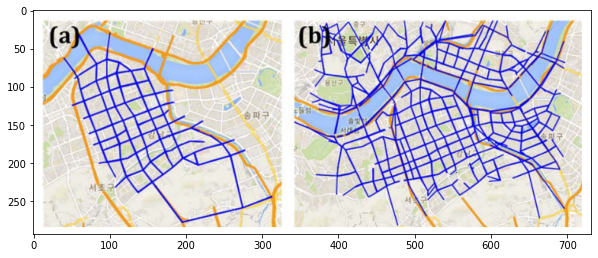

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
plt.imshow(mpimg.imread('https://user-images.githubusercontent.com/31876093/141141076-7d44ed1e-7868-4cf4-9e93-3597b1d97f9f.png'))
plt.show()

## Using Seoul Urban Core Data

In [3]:
import pandas as pd
import numpy as np

def read_data(features_csv, adj_csv):
    urban_core_speeds = pd.read_csv(features_csv, header=None)
    adj_matrix_df = pd.read_csv(adj_csv, header=None)
    adj_matrix = np.array(adj_matrix_df)

    speeds_df = urban_core_speeds.iloc[:, 7:]
    speeds = np.array(speeds_df)
    
    return adj_matrix_df, urban_core_speeds, adj_matrix, speeds

In [52]:
adj_matrix_df, urban_core_speeds, adj_matrix, speeds = read_data(
    '../input/seoul-speed-data/urban-core.csv', 
    '../input/seoul-speed-data/Adj(urban-core).csv')

The adjacency matrix show unweighted graph which means that values are only 0 and 1, 0 when there is no connection between nodes and 1 when there a connection.

In [5]:
adj_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


The nodes features are the traffic information on the road network (i.e. speed here), The speed changes accross the time slots. 

In [6]:
urban_core_speeds

,0,1,2,3,4,5,6,7,8,9,...,8637,8638,8639,8640,8641,8642,8643,8644,8645,8646
0,1.210006e+09,6200.0,201560.3779,446938.8683,60.0,353.0,0.0,49.39,49.74,48.69,...,49.58,48.15,48.96,49.07,49.03,48.96,49.44,48.72,49.80,49.58
1,1.210006e+09,6300.0,201571.2295,446944.0685,60.0,359.0,1.0,53.34,52.38,53.20,...,51.13,51.34,51.28,51.90,51.91,50.70,50.95,51.55,52.99,52.20
2,1.210007e+09,7000.0,208647.6878,440703.4867,60.0,3084.0,0.0,39.47,39.22,38.84,...,35.42,36.83,36.93,36.18,35.79,34.78,35.94,36.47,34.78,35.21
3,1.210007e+09,7100.0,208703.2065,440694.2090,60.0,3077.0,1.0,29.02,34.66,34.49,...,29.60,32.36,32.66,33.09,33.77,30.38,48.38,36.53,33.29,33.24
4,1.210008e+09,7800.0,205525.6112,441413.0221,60.0,2429.0,1.0,48.33,46.12,50.23,...,46.60,50.99,51.81,48.02,48.25,47.16,48.07,46.30,47.90,52.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1.220037e+09,36900.0,203020.8489,447993.1900,60.0,419.0,0.0,46.22,44.86,47.40,...,40.56,40.47,40.69,39.66,41.80,41.70,40.72,37.27,42.97,41.78
300,1.220037e+09,37000.0,202025.3534,448209.1085,60.0,1028.0,1.0,57.24,56.30,57.34,...,55.40,56.44,58.30,55.26,56.32,57.12,55.97,58.98,57.34,60.92
301,1.220037e+09,37100.0,201998.4093,448309.9847,60.0,1024.0,0.0,59.56,57.49,59.51,...,39.56,42.05,36.17,45.71,43.80,47.92,49.52,52.32,50.18,57.08
302,1.220037e+09,37200.0,203027.4559,448161.0135,60.0,852.0,1.0,61.14,60.25,59.74,...,61.10,58.90,59.38,59.47,62.37,59.50,61.51,59.59,60.62,61.42


In [7]:
"""Each sensor record an obseravtion either 0 or 1 speeds at the beginning of the recording"""
set(urban_core_speeds.iloc[: , 6])

{0.0, 1.0}

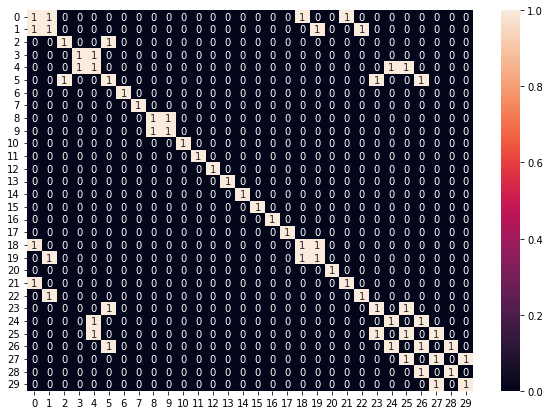

In [8]:
"""plot the first 30 sensors adjacency matrix"""
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
ax = sns.heatmap(adj_matrix[:30, :30], annot=True)
plt.show()

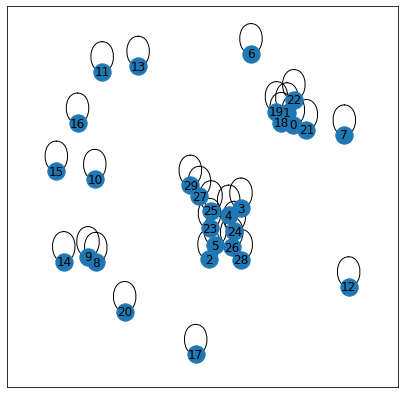

In [9]:
"""Network graph of the nodes"""
import networkx as nx

G = nx.from_numpy_array(adj_matrix[:30, :30])
G.edges(data=True)
plt.figure(figsize=(7,7))
nx.draw_networkx(G)
plt.axis('equal')
plt.show()

So, the data consists of 8639 excluding the first observation. 

We start here by train test split. Since each sensor has a series of speeds, The train data will be the first 75% of the recoding and the rest will be the test data 

In [53]:
train_test_split = 0.75

split = int(speeds.shape[1] * train_test_split)
train_data = speeds[:, :split]
test_data = speeds[:, split:]

print("Train data: ", train_data.shape)
print("Test data: ", test_data.shape)

Train data:  (304, 6480)
Test data:  (304, 2160)


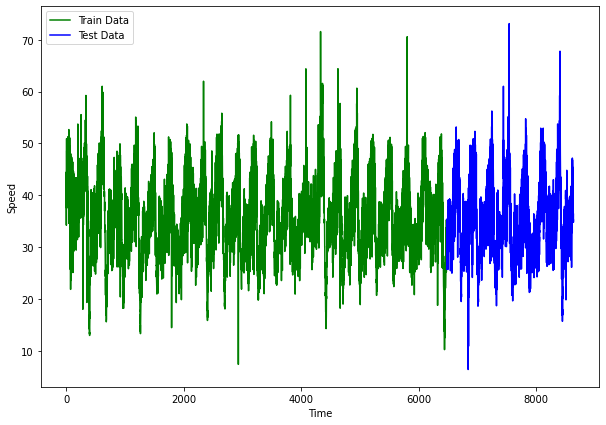

In [11]:
plt.figure(figsize=(10,7))
plt.plot(range(len(train_data[2])), train_data[2], 'g', label="Train Data")
plt.plot(range(len(train_data[2]), len(speeds[2])), test_data[2], 'b', label="Test Data")
plt.xlabel('Time')
plt.ylabel('Speed')
plt.legend(loc="upper left")
plt.show()

In [54]:
"""Min max standardizing the data"""
max_speed = train_data.max()
min_speed = train_data.min()
train_scaled = (train_data - min_speed) / (max_speed - min_speed)
test_scaled = (test_data - min_speed) / (max_speed - min_speed)

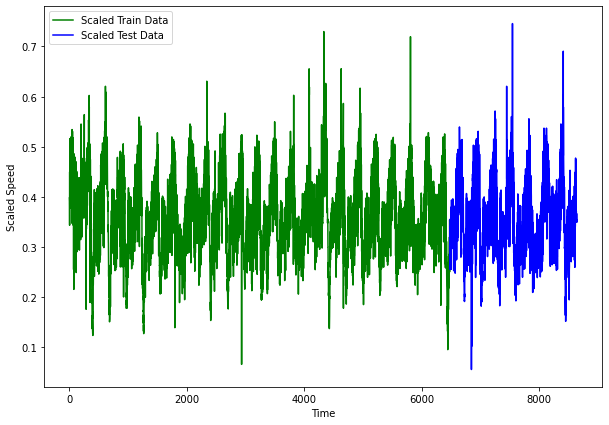

In [13]:
plt.figure(figsize=(10,7))
plt.plot(range(len(train_data[2])), train_scaled[2], 'g', label="Scaled Train Data")
plt.plot(range(len(train_data[2]), len(speeds[2])), test_scaled[2], 'b', label="Scaled Test Data")
plt.xlabel('Time')
plt.ylabel('Scaled Speed')
plt.legend(loc="upper left")
plt.show()

In [55]:
seq_len = 10
pre_len = 12

def build_features_labels(seq_len, pre_len, train_data, test_data):
    X_train, Y_train, X_test, Y_test = [], [], [], []

    for i in range(train_data.shape[1] - int(seq_len + pre_len - 1)):
        a = train_data[:, i : i + seq_len + pre_len]
        X_train.append(a[:, :seq_len])
        Y_train.append(a[:, -1])

    for i in range(test_data.shape[1] - int(seq_len + pre_len - 1)):
        b = test_data[:, i : i + seq_len + pre_len]
        X_test.append(b[:, :seq_len])
        Y_test.append(b[:, -1])

    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)

    return X_train, Y_train, X_test, Y_test


X_train, Y_train, X_test, Y_test = build_features_labels(seq_len, pre_len, train_scaled, test_scaled)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

"""Ref: https://stellargraph.readthedocs.io/en/stable/demos/time-series/gcn-lstm-time-series.html"""

(6459, 304, 10)
(6459, 304)
(2139, 304, 10)
(2139, 304)


'Ref: https://stellargraph.readthedocs.io/en/stable/demos/time-series/gcn-lstm-time-series.html'

In [15]:
!pip install stellargraph
clear_output()

The original TGCN article is https://arxiv.org/pdf/1811.05320.pdf. The method is used to capture the spatial and temporal aspects which is in combination with the graph convolutional network (GCN to capture spatial dependence) and gated network (GRU or LSTM in original article to capture temporal dependence). We use LSTM here. (Github: https://github.com/lehaifeng/T-GCN). The traffic volume changes based on the urban road network complex topological structure (Spatial). The traffic volume changes over time with periodicity and trend (Temporal). The GCN captures the topological feature then fed into the LSTM model and the dynamic change to obtain the temporal feature then it is fed through a fully connected layer.

The GCN is based on the basic concept of message passing algorithm. The message passing is based on the adjacency matrix that encodes the connection between the nodes in the graph. The message passing in a simple way can be the sum or average (scaling) of connected neighbourhood of each node. This basicly helps to get features of each node based on it's surrounding. The mathimatical explanation of this is shown in the article https://arxiv.org/pdf/1811.05320.pdf. Convolution here acts as features smoothing where all the features are aggregated from the connected nodes (i.e. average) which is passed into a standard NN layers. 

LSTM is a special architecture of RNN and was introduced by Hochreiter and Schmidhuber to capture long term dependencies using gates to delete and add information from earlier states (data representations). The LSTM is a trainable cell that contains forget gate, input gate and output gate to detemine what information to pass forward (to keep) in the data represenations (hidden state).  

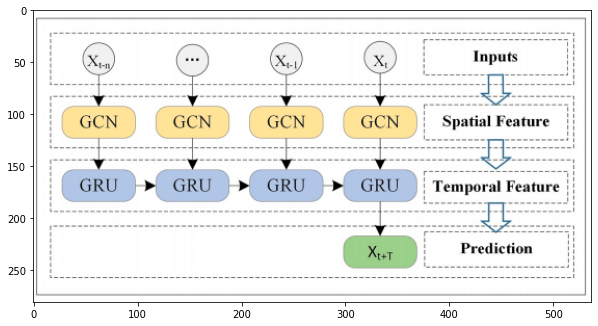

In [16]:
"""Ref: https://arxiv.org/pdf/1811.05320.pdf"""
plt.figure(figsize=(10,10))
plt.imshow(mpimg.imread('https://raw.githubusercontent.com/mhmdrdwn/traffic/main/plots/tgcn.png'))
plt.show()

In [40]:
from stellargraph.layer import GCN_LSTM
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

def build_model():
    gcn_lstm = GCN_LSTM(
        seq_len=seq_len,
        adj=adj_matrix,
        gc_layer_sizes=[16, 10],
        gc_activations=["relu", "relu"],
        lstm_layer_sizes=[200, 200],
        lstm_activations=["tanh", "tanh"],
    )

    x_input, x_output = gcn_lstm.in_out_tensors()
    model = Model(inputs=x_input, outputs=x_output)
    model.compile(optimizer="adam", loss="mse")
    
    return model

clear_output()

In [56]:
model = build_model()
model.summary() 

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 304, 10)]         0         
_________________________________________________________________
tf.expand_dims_3 (TFOpLambda (None, 304, 10, 1)        0         
_________________________________________________________________
reshape_9 (Reshape)          (None, 304, 10)           0         
_________________________________________________________________
fixed_adjacency_graph_convol (None, 304, 16)           92880     
_________________________________________________________________
fixed_adjacency_graph_convol (None, 304, 10)           92880     
_________________________________________________________________
reshape_10 (Reshape)         (None, 304, 10, 1)        0         
_________________________________________________________________
permute_3 (Permute)          (None, 10, 304, 1)        0   

In [57]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, shuffle=True, verbose=1, validation_split=0.1)

Epoch 1/20
182/182 [==============================] - 15s 53ms/step - loss: 0.0083 - val_loss: 0.0033
Epoch 2/20
182/182 [==============================] - 9s 51ms/step - loss: 0.0036 - val_loss: 0.0030
Epoch 3/20
182/182 [==============================] - 9s 48ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 4/20
182/182 [==============================] - 9s 48ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 5/20
182/182 [==============================] - 9s 48ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 6/20
182/182 [==============================] - 9s 51ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 7/20
182/182 [==============================] - 9s 47ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 8/20
182/182 [==============================] - 9s 48ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 9/20
182/182 [==============================] - 9s 52ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 10/20
182/182 [==============================] - 9s 48ms/step - loss: 0.0024 - val_l

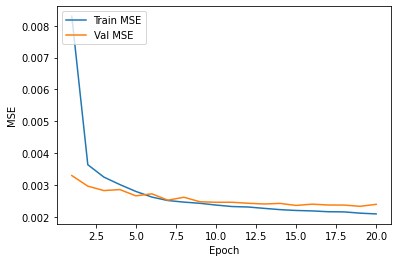

In [58]:
#mse = history.history['mse']
loss = history.history['loss']
#val_mse = history.history['val_mse']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Train MSE')
plt.plot(epochs, val_loss, label='Val MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(loc="upper left")
plt.show()

In [59]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test) 

In [60]:
"""descale values (get original values before scaling)"""
max_speed = train_data.max()
min_speed = train_data.min()
train_original = np.array(Y_train * max_speed)
test_original = np.array(Y_test * max_speed)
train_preds = np.array((train_preds) * max_speed)
test_preds = np.array((test_preds) * max_speed)

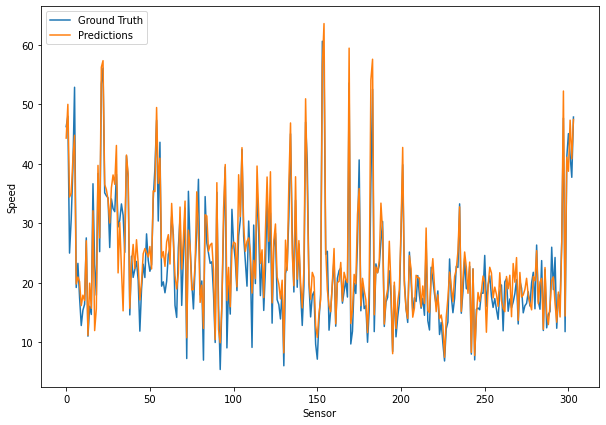

In [62]:
"""Predictions for all sensors (304 sensors) at time step 2"""
plt.figure(figsize=(10,7))
plt.plot(range(len(test_original[2])), test_original[2], label='Ground Truth')
plt.plot(range(len(test_preds[2])), test_preds[2], label='Predictions')
plt.xlabel('Sensor')
plt.ylabel('Speed')
plt.legend(loc="upper left")
plt.show()

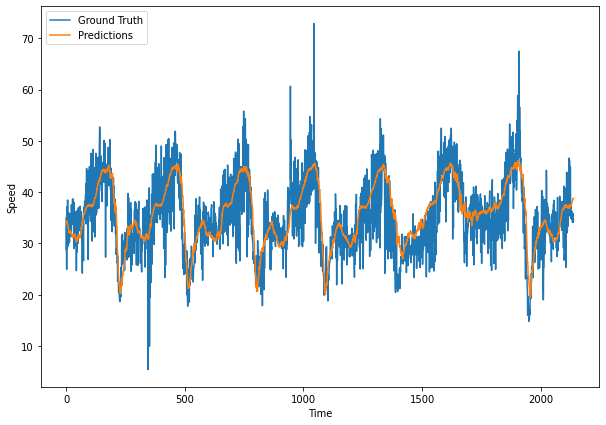

In [63]:
"""Time series Predicstions for a single sensor (sensor number 3)"""
plt.figure(figsize=(10,7))
plt.plot(range(len(test_original[:, 2])), test_original[:, 2], label='Ground Truth')
plt.plot(range(len(test_preds[:, 2])), test_preds[:, 2], label='Predictions')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.legend(loc="upper left")
plt.show()

In [70]:
"""Overall evaluatuation the predictions of the test data"""
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('RMSE: ', np.sqrt(mean_squared_error(test_original, test_preds)))
print('MAE: ', np.sqrt(mean_absolute_error(test_original, test_preds)))
print('MAPE: ', np.sqrt(mean_absolute_percentage_error(test_original, test_preds)))

RMSE:  4.333378658129614
MAE:  1.7423874015908587
MAPE:  3.6735078346941608


## Using Seoul Urban Mix Data

The same format of Urban core dataset but it is bigger, Urban mix dataset contains instead 1007 sensors of 304 sensors

In [71]:
adj_matrix_df, urban_core_speeds, adj_matrix, speeds = read_data(
    '../input/seoul-speed-data/urban-mix.csv', 
    '../input/seoul-speed-data/Adj(urban-mix).csv')

In [72]:
train_test_split = 0.75

split = int(speeds.shape[1] * train_test_split)
train_data = speeds[:, :split]
test_data = speeds[:, split:]

print("Train data: ", train_data.shape)
print("Test data: ", test_data.shape)

Train data:  (1007, 6480)
Test data:  (1007, 2160)


In [73]:
"""Min max standardizing the data"""
max_speed = train_data.max()
min_speed = train_data.min()
train_scaled = (train_data - min_speed) / (max_speed - min_speed)
test_scaled = (test_data - min_speed) / (max_speed - min_speed)

In [74]:
X_train, Y_train, X_test, Y_test = build_features_labels(seq_len, pre_len, train_scaled, test_scaled)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(6459, 1007, 10)
(6459, 1007)
(2139, 1007, 10)
(2139, 1007)


In [77]:
model = build_model()

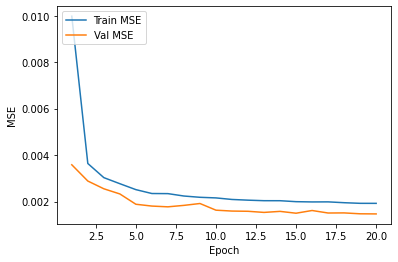

In [78]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, shuffle=True, verbose=0, validation_split=0.1)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Train MSE')
plt.plot(epochs, val_loss, label='Val MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(loc="upper left")
plt.show()

In [79]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [80]:
"""descale values (get original values before scaling)"""
max_speed = train_data.max()
min_speed = train_data.min()

train_original = np.array(Y_train * max_speed)
test_original = np.array(Y_test * max_speed)
train_preds = np.array((train_preds) * max_speed)
test_preds = np.array((test_preds) * max_speed)

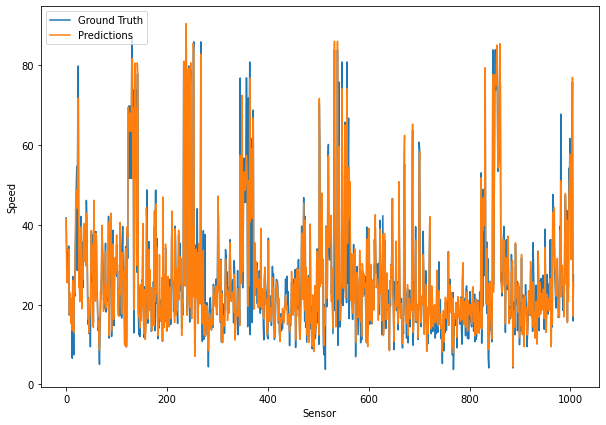

In [81]:
"""Predictions for all sensors (1007 sensors) at time step 2"""
plt.figure(figsize=(10,7))
plt.plot(range(len(test_original[2])), test_original[2], label='Ground Truth')
plt.plot(range(len(test_preds[2])), test_preds[2], label='Predictions')
plt.xlabel('Sensor')
plt.ylabel('Speed')
plt.legend(loc="upper left")
plt.show()

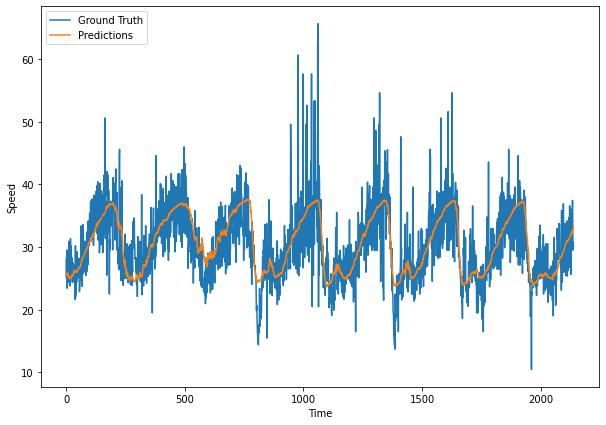

In [82]:
"""Time series Predicstions for a single sensor (sensor number 3)"""
plt.figure(figsize=(10,7))
plt.plot(range(len(test_original[:, 2])), test_original[:, 2], label='Ground Truth')
plt.plot(range(len(test_preds[:, 2])), test_preds[:, 2], label='Predictions')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.legend(loc="upper left")
plt.show()

In [97]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    y_true +=  0.001 #add small values to true velocities to avoid division by zeros
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('RMSE: ', np.sqrt(mean_squared_error(test_original, test_preds)))
print('MAE: ', np.sqrt(mean_absolute_error(test_original, test_preds)))
print('MAPE: ', np.sqrt(mean_absolute_percentage_error(test_original, test_preds)))

RMSE:  5.06317103317669
MAE:  1.80527016488151
MAPE:  3.8646457772099274


# References

-  Shin, Y., & Yoon, Y. (2020). Incorporating dynamicity of transportation network with multi-weight traffic graph convolutional network for traffic forecasting. IEEE Transactions on Intelligent Transportation Systems.

-  Zhao, Ling and Song, Yujiao and Zhang, Chao and Liu, Yu and Wang, Pu and Lin, Tao and Deng, Min and Li, Haifeng (2019), T-GCN: A Temporal Graph Convolutional Network for Traffic Prediction. IEEE Transactions on Intelligent Transportation Systems.

- https://stellargraph.readthedocs.io/en/stable/demos/time-series/gcn-lstm-time-series.html

- https://www.youtube.com/watch?v=OI0Jo-5d190&list=PLSgGvve8UweGx4_6hhrF3n4wpHf_RV76_
